In [1]:
%load_ext autoreload
%autoreload 2

# general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# custom
from reflectance import plotting, file_ops, optimisation_pipeline, spectrum_utils

In [2]:
results_fp = "/Users/rt582/Desktop/results_summary.csv"
prism_spectra = spectrum_utils.preprocess_prism_spectra(spectrum_utils.load_spectra())

import ast  # To convert string representations of lists to actual lists

# Define custom converters for list columns
def list_converter(val):
    try:
        return ast.literal_eval(val) if isinstance(val, str) else val
    except (ValueError, SyntaxError):
        return val

# Load CSV with correct data types
results_df = pd.read_csv(results_fp, 
                 header=[0,1],
                 parse_dates=[('metadata','datetime (UTC)')],  # Assuming 'metadata' is a datetime column in the multi-index
                 converters={
                     ('processing', 'nir_wavelengths'): list_converter,
                     ('processing', 'sensor_range'): list_converter,
                     ('processing', 'endmember_bounds'): list_converter,
                     ('processing', 'endmember_dimensionality_reduction'): list_converter,
                     ('fitting', 'bb_bounds'): list_converter,
                     ('fitting', 'Kd_bounds'): list_converter,
                     ('fitting', 'H_bounds'): list_converter,
                    ('simulation', 'Rb_vals'): list_converter,
                    ('simulation', 'depth_lims'): list_converter,
                    ('simulation', 'k_lims'): list_converter,
                    ('simulation', 'bb_lims'): list_converter,
                    ('simulation', 'noise_lims'): list_converter,
                     ('processing', 'endmember_source'): lambda x: x if x != 'None' else None,  # Convert 'None' strings to None
                     ('processing', 'save_fits'): lambda x: x == 'True',  # Convert to boolean
                 }
)

In [3]:
sub_df = results_df[results_df['fitting']['objective_fn'] == 'spectral_angle']
sub_df = results_df
best_row = sub_df.loc[sub_df['r2', 'mean'].idxmax()]
# sub_df = results_df[results_df['fitting']['objective_fn'] == 'r2']
# sub_df = results_df
# best_row = sub_df.loc[sub_df['r2', 'mean'].idxmax()]

# Initialize the dictionary
best_cfg_params_dict = {
    'processing': {},
    'simulation': {},
    'fitting': {}
}

for (level_0, level_1) in best_row.index:
    value = best_row[(level_0, level_1)]
    if level_0 in best_cfg_params_dict:
        if not isinstance(value, list):
            value = None if pd.isna(value) else value
            
        best_cfg_params_dict[level_0][level_1] = value

In [ ]:
rerun=True
if rerun:
    # run pipeline with cfg
    g_cfg, _ = file_ops.instantiate_single_configs_instance(run_ind = 0)
    g_cfg.save_fits = True
    cfg = file_ops.RunOptPipeConfig(best_cfg_params_dict)

    pipe = optimisation_pipeline.OptPipe(g_cfg, cfg)
    fit_results = pipe.run()



load_aop_model
generate_endmembers
preprocess_endmembers
load_spectra
preprocess_spectra
fit_spectra


Fitting spectra:   0%|          | 0/1938 [00:00<?, ?it/s]

In [28]:
fit_fp = "/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/coralreflections/results/fits/fit_results_1.csv"
fits = pd.read_csv(fit_fp, header=[0,1])
fits.fitted_params.head()

,bb,K,H,"('algae', 'PCA_1')","('coral', 'PCA_1')","('sand', 'PCA_1')"
0,0.385805,0.705707,3.395330,0.683437,0.277242,0.637802
1,0.390605,0.705111,3.385995,0.676781,0.322097,0.581538
2,0.354320,0.663175,3.427786,0.672484,0.312580,0.499252
3,0.394862,0.707063,3.497552,0.649563,0.371698,0.559219
4,0.400822,0.733364,3.354579,0.651350,0.323828,0.652869


In [18]:
fits

fitted_params                                                             \
                bb         K          H ('algae', 'PCA_1') ('coral', 'PCA_1')   
0         0.385805  0.705707   3.395330           0.683437           0.277242   
1         0.390605  0.705111   3.385995           0.676781           0.322097   
2         0.354320  0.663175   3.427786           0.672484           0.312580   
3         0.394862  0.707063   3.497552           0.649563           0.371698   
4         0.400822  0.733364   3.354579           0.651350           0.323828   
...            ...       ...        ...                ...                ...   
1933      0.052057  0.283238  12.841902          -0.933620          -0.639212   
1934      0.050987  0.305306  12.591032          -0.936692          -0.583761   
1935      0.046227  0.296045  10.923569          -0.551410          -0.266833   
1936      0.048902  0.268991  12.149778          -0.207298          -0.246128   
1937      0.049705  0.254916  13.349138           0.029718          -0.176467   

                       fitted_spectra                                      \
     ('sand', 'PCA_1')    452.6427748 455.4750562 458.3073937 461.1397875   
0             0.637802       0.160828    0.162001    0.163048    0.164121   
1             0.581538       0.160381    0.161520    0.162533    0.163575   
2             0.499252       0.150419    0.151466    0.152392    0.153343   
3             0.559219       0.162043    0.163170    0.164175    0.165213   
4             0.652869       0.162576    0.163761    0.164819    0.165907   
...                ...            ...         ...         ...         ...   
1933          1.996946       0.072340    0.072732    0.073121    0.073650   
1934          2.289718       0.076645    0.077230    0.077799    0.078523   
1935          2.173379       0.086041    0.086853    0.087613    0.088545   
1936          1.439426       0.077959    0.078580    0.079165    0.079887   
1937          1.128324       0.078074    0.078686    0.079264    0.079975   

      ...                                                              \
      ... 676.5662746 679.4029988 682.2397794 685.0766161 687.9135091   
0     ...    0.064561    0.064084    0.063774    0.063667    0.063801   
1     ...    0.064657    0.064201    0.063937    0.063906    0.064148   
2     ...    0.059710    0.059281    0.059043    0.059036    0.059288   
3     ...    0.064187    0.063732    0.063458    0.063409    0.063628   
4     ...    0.066210    0.065752    0.065483    0.065446    0.065686   
...   ...         ...         ...         ...         ...         ...   
1933  ...    0.008978    0.008831    0.008634    0.008387    0.008100   
1934  ...    0.008821    0.008675    0.008479    0.008233    0.007947   
1935  ...    0.008584    0.008425    0.008211    0.007942    0.007629   
1936  ...    0.008666    0.008520    0.008325    0.008083    0.007801   
1937  ...    0.008703    0.008561    0.008374    0.008141    0.007870   

       metrics                                                       
            r2 spectral_angle      rmse mean_abs_dev median_abs_dev  
0     0.999001       0.009067  0.001341     0.001039       0.000812  
1     0.998845       0.009684  0.001430     0.001108       0.000847  
2     0.998875       0.009643  0.001331     0.001035       0.000908  
3     0.999006       0.009126  0.001356     0.001066       0.000765  
4     0.998873       0.009520  0.001431     0.001069       0.000829  
...        ...            ...       ...          ...            ...  
1933  0.998360       0.021875  0.001053     0.000870       0.000778  
1934  0.998927       0.017886  0.000944     0.000804       0.000712  
1935  0.998957       0.017751  0.001114     0.000927       0.000902  
1936  0.998797       0.018793  0.001038     0.000867       0.000843  
1937  0.998787       0.018924  0.001040     0.000860       0.000746  

[1938 rows x 95 columns]

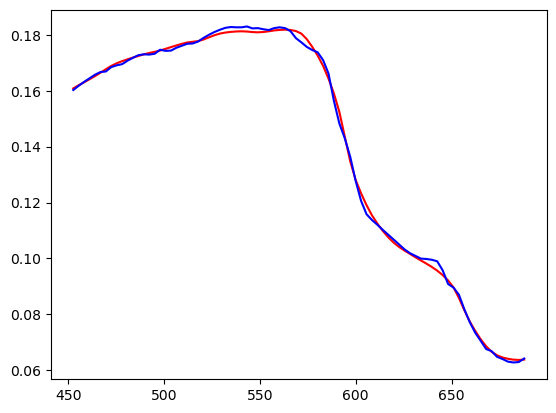

In [26]:
i = 0

wvs = fits.fitted_spectra.columns.astype(float)

plt.plot(wvs, fits.fitted_spectra.iloc[i], c="r")
plt.plot(wvs, prism_spectra.iloc[i], c="b")

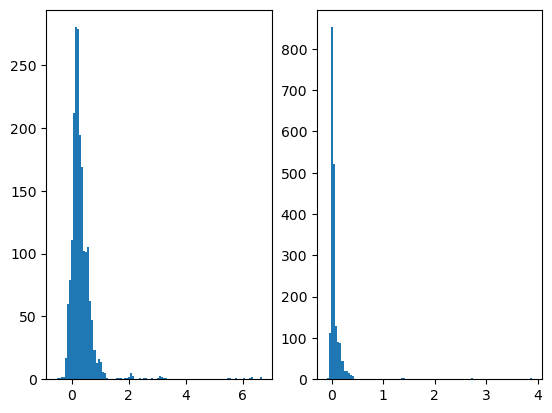

In [20]:
fig, ax = plt.subplots(1,2)

ax[0].hist(fits.fitted_params.K, bins=100);
ax[1].hist(fits.fitted_params.bb, bins=100);

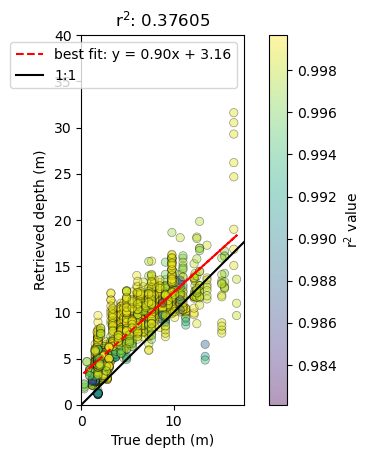

In [23]:
from sklearn.metrics import r2_score
validation_data = pd.read_csv(file_ops.DATA_DIR_FP / "CORAL_validation_data_v2.csv")


fig, ax = plt.subplots()
ma = ax.scatter(validation_data.Depth[:len(fits)], fits.fitted_params["H"], alpha=0.4, c=fits.metrics.r2, edgecolor='k', lw=0.5)

# calculate fits
p = np.polyfit(validation_data.Depth[:len(fits)], fits.fitted_params["H"].astype(float), 1)
pred = np.polyval(p, validation_data.Depth[:len(fits)])
r2 = r2_score(validation_data.Depth[:len(fits)], pred)
ax.plot(validation_data.Depth[:len(fits)], pred, color='r', ls='--', label="best fit: y = {:.2f}x + {:.2f}".format(*p))
# formatting
ax.set_xlim(left=0)
ax.set_ylim(bottom=0, top=40)
ax.plot(ax.get_xlim(),ax.get_xlim(), color='k', label='1:1')
ax.set_title(f"r$^2$: {r2:.5f}")
ax.set_xlabel("True depth (m)")
ax.set_ylabel("Retrieved depth (m)")
ax.set_aspect('equal')
fig.colorbar(ma, label="r$^2$ value")
ax.legend()

In [33]:
fits.fitted_params

,bb,K,H,"('algae', 'PCA_1')","('coral', 'PCA_1')","('sand', 'PCA_1')"
0,0.385805,0.705707,3.395330,0.683437,0.277242,0.637802
1,0.390605,0.705111,3.385995,0.676781,0.322097,0.581538
2,0.354320,0.663175,3.427786,0.672484,0.312580,0.499252
3,0.394862,0.707063,3.497552,0.649563,0.371698,0.559219
4,0.400822,0.733364,3.354579,0.651350,0.323828,0.652869
...,...,...,...,...,...,...
1933,0.052057,0.283238,12.841902,-0.933620,-0.639212,1.996946
1934,0.050987,0.305306,12.591032,-0.936692,-0.583761,2.289718
1935,0.046227,0.296045,10.923569,-0.551410,-0.266833,2.173379
1936,0.048902,0.268991,12.149778,-0.207298,-0.246128,1.439426


ValueError: Dot product shape mismatch, (84, 22) vs (3,)

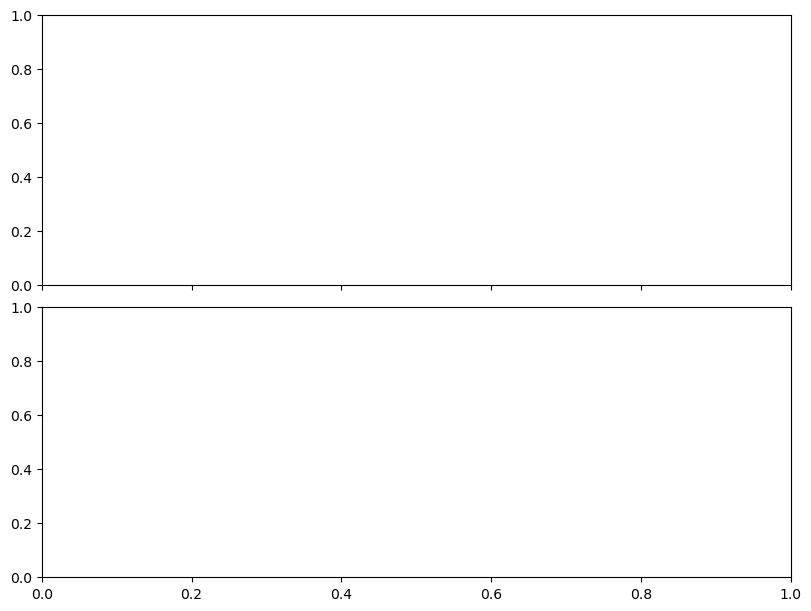

In [34]:
AOP_model = spectrum_utils.load_aop_model(aop_group_num=1).loc[spectrum_utils.SENSOR_RANGE[0]:spectrum_utils.SENSOR_RANGE[1]]
wvs = AOP_model.index
AOP_sub = AOP_model.loc[wvs]
AOP_args = (AOP_sub.bb_m.values, AOP_sub.bb_c.values, AOP_sub.Kd_m.values, AOP_sub.Kd_c.values)

# read in spectral library
f = file_ops.RESOURCES_DIR_FP / "spectral_library_clean_v3_PRISM_wavebands.csv"
df = pd.read_csv(f, skiprows=1).set_index('wavelength')
df.columns = df.columns.astype(float)
df = df.astype(float)

# generate endmembers
endmember_class_schema = best_row.processing["endmember_class_schema"]
glob_cfg, _ = file_ops.instantiate_single_configs_instance(run_ind = 0)
# generate endmember array
endmember_array = optimisation_pipeline.GenerateEndmembers(
    endmember_class_map=glob_cfg.endmember_schema[endmember_class_schema],
    endmember_dimensionality_reduction=best_cfg_params_dict["processing"]["endmember_dimensionality_reduction"],
).generate_endmembers()
# crop to sensor range
endmember_array = endmember_array.loc[:,spectrum_utils.SENSOR_RANGE[0]:spectrum_utils.SENSOR_RANGE[1]]

fit = fits.fitted_params.iloc[i,:3+len(endmember_array)]
true_spectrum = prism_spectra.iloc[i,:]
# plot problem fits
plotting.plot_single_fit(fit, true_spectrum, AOP_args, endmember_array, endmember_array.index)

In [51]:
og_validation_data = pd.read_csv(
            file_ops.DATA_DIR_FP / "CORAL_validation_data.csv"
        )
og_validation_data.columns

Index(['X', 'Y', 'Campaign', 'Locale', 'Station', 'TimeUTC', 'TimeLocal',
       'Depth', 'Metabolism', 'Optics', 'Comments', 'algCCA', 'algCyano',
       'algMacBrn', 'algMacGrn', 'algMacMix', 'algMacRed', 'algMacUnk',
       'algTurf', 'crlCoral', 'crlBleach', 'othOcto', 'othSeagr', 'othClam',
       'othInvert', 'othOther', 'othSponge', 'othUrchin', 'sedLimest',
       'sedMud', 'sedRubble', 'sedSand', 'ROInumber', 'Flightline'],
      dtype='object')

In [36]:
validation_data = spectrum_utils.map_validation(og_validation_data, g_cfg.__dict__["endmember_map"])
endmember_class_schema = "three_endmember"
endmember_schema_map = g_cfg.__dict__["endmember_schema"][endmember_class_schema]
grouped_val_data = pd.DataFrame()
# group validation data by endmember categories in endmember_schema_map
for (endmember_dimensionality_reduction, validation_fields) in endmember_schema_map.items():
    # fill in validation data with sum of all fields in the category
    
    grouped_val_data[endmember_dimensionality_reduction] = validation_data[
        validation_fields
    ].sum(axis=1)
    

# normalise grouped_val_data along rows
grouped_val_data = grouped_val_data.div(grouped_val_data.sum(axis=1), axis=0)


In [37]:
# normalise fit param results
fit_params = fits.fitted_params.iloc[:,3:]
# normalise fit_params along rows
norm_benthic_fit_params = fit_params.div(fit_params.sum(axis=1), axis=0)

In [52]:
pd.concat([grouped_val_data, og_validation_data["Depth"]], axis=1)

,algae,coral,sand,Depth
0,0.720000,0.010000,0.270000,1.6
1,0.720000,0.010000,0.270000,1.6
2,0.720000,0.010000,0.270000,1.6
3,0.720000,0.010000,0.270000,1.6
4,0.720000,0.010000,0.270000,1.6
...,...,...,...,...
1933,0.602041,0.367347,0.030612,8.5
1934,0.602041,0.367347,0.030612,8.5
1935,0.505051,0.484848,0.010101,6.1
1936,0.505051,0.484848,0.010101,6.1


[None, None, None, None, None, None, None, None, None, None]

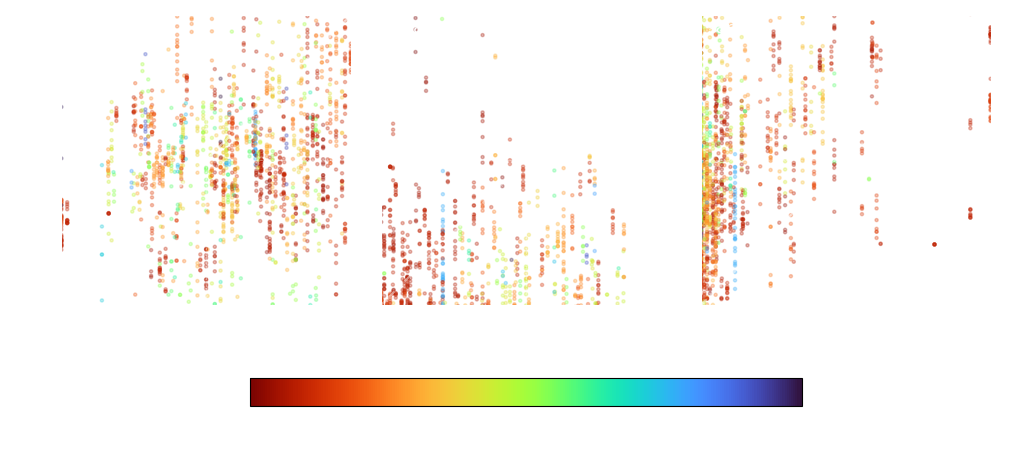

In [91]:
# plot retrieved endmembers against true endmembers
fig, axs = plt.subplots(1, 3, figsize=[10, 5], sharex=True, sharey=True, constrained_layout=True)

for endmember, ax in zip(norm_benthic_fit_params.columns, axs.flat):
    temp_scatter = ax.scatter(grouped_val_data[endmember], norm_benthic_fit_params[endmember], s=5, alpha=1, c=og_validation_data["Depth"], cmap="turbo_r")
    ax.cla()
    ax.patch.set_alpha(0)
    fig.patch.set_alpha(0)
    # print(endmember[0])
    scatter = ax.scatter(grouped_val_data[endmember], norm_benthic_fit_params[endmember], s=5, alpha=0.3, c=og_validation_data["Depth"], cmap="turbo_r")
    ax.text(0.02, 0.98, endmember, ha='left', va='top', transform=ax.transAxes, fontsize=12, c="white")
    # ax.axis('square')
    ax.plot([0,1], [0,1], color='white', ls='--', alpha=0.5)
    ax.set_ylim(0, 1)
    plotting.format_axis_for_ppt(ax)
    # ax.legend(facecolor='black', framealpha=0.3, labelcolor="white", fontsize=12, loc="upper right")
    ax.grid(True, color='white', ls='--', linewidth=0.5, alpha=0.5, which='both')
    ax.set_aspect('equal')
    # plot x and y every 0.5
    ax.set_xticks(np.arange(0, 1.1, 0.5))
    ax.set_yticks(np.arange(0, 1.1, 0.5))
    
    ax.set_xlim(0, 1)
axs[0].set_ylabel("Predicted", color="white")
axs[1].set_xlabel("Ground truth", color="white")
        

cbar = fig.colorbar(temp_scatter, ax=axs, label="Depth (m)", orientation='horizontal', fraction=0.08, pad=0.08)
cbar.set_label("Depth (m)", color="white", alpha=1)
# set cbar ticks as white
cbar.ax.xaxis.set_tick_params(color='white')
# set cbar tick labels as white

plt.setp(plt.getp(cbar.ax.axes, 'xticklabels'), color='white')